In [ ]:
PROVIDE_OWN_INPUT = True

In [ ]:
from google.colab import files
files.upload()

Saving dataset6.csv to dataset6.csv
Saving test_data.csv to test_data.csv


{'dataset6.csv': b'Company Name,REVENUE,OPERATING PROFIT,PAT,OCF,OCF/OPE PRO,ROE,ROCE,D/E,Asset Turnover,EBIDTAM (%),PATM(%),DIV PAYOUT RATIO,Free Float,5 YR Sales CAGR,5 YR OP CAGR,Ev/EBITDA,M/Sales\r\nMultibase India Ltd.,109.94,19.62,15.36,5.17,0.263506626,16.77,23.84,0,0.97,19.85,13.97,0,23.93,0.121380006,0.220486449,20.9,5.8\r\nVoith Paper Fabrics India Ltd.,112.03,29.27,23.09,16.74,0.571916638,11.36,15.98,0,0.44,28.99,20.61,9.51,24.11,0.018935827,0.166579054,6.17,3.6\r\nMorganite Crucible (India) Ltd.,120.14,20.2,15.37,20.52,1.015841584,16.17,23,0,1,18.2,12.79,29.15,25,0.017791896,0.022985744,12.43,3.85\r\nSaint-Gobain Sekurit India Ltd.,159.76,25.77,16.08,23.59,0.91540551,14.83,20.41,0.03,1.24,14.36,10.06,0,25,0.037345153,0.22872586,17.47,3.56\r\nXchanging Solutions Ltd.,184.1,42.73,46.71,48.14,1.12660894,11.44,13.91,0,0.36,30.86,25.37,0,6.5,-0.084972011,0.199472801,11.05,2.91\r\nAsian Oilfield Services Ltd.,193.86,32.88,9.1,34.81,1.058698297,6.25,9.08,0.07,0.82,7.69,4.69,0,23.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('dataset6.csv')

In [ ]:
data.head()

,Company Name,REVENUE,OPERATING PROFIT,PAT,OCF,OCF/OPE PRO,ROE,ROCE,D/E,Asset Turnover,EBIDTAM (%),PATM(%),DIV PAYOUT RATIO,Free Float,5 YR Sales CAGR,5 YR OP CAGR,Ev/EBITDA,M/Sales
0,Multibase India Ltd.,109.94,19.62,15.36,5.17,0.263507,16.77,23.84,0.00,0.97,19.85,13.97,0.00,23.93,0.121380,0.220486,20.90,5.80
1,Voith Paper Fabrics India Ltd.,112.03,29.27,23.09,16.74,0.571917,11.36,15.98,0.00,0.44,28.99,20.61,9.51,24.11,0.018936,0.166579,6.17,3.60
2,Morganite Crucible (India) Ltd.,120.14,20.20,15.37,20.52,1.015842,16.17,23.00,0.00,1.00,18.20,12.79,29.15,25.00,0.017792,0.022986,12.43,3.85
3,Saint-Gobain Sekurit India Ltd.,159.76,25.77,16.08,23.59,0.915406,14.83,20.41,0.03,1.24,14.36,10.06,0.00,25.00,0.037345,0.228726,17.47,3.56
4,Xchanging Solutions Ltd.,184.10,42.73,46.71,48.14,1.126609,11.44,13.91,0.00,0.36,30.86,25.37,0.00,6.50,-0.084972,0.199473,11.05,2.91


In [ ]:
data = data.replace( ' -   ', np.nan)

In [ ]:
data.dtypes

Company Name         object
REVENUE             float64
OPERATING PROFIT    float64
PAT                 float64
OCF                 float64
OCF/OPE PRO         float64
ROE                 float64
ROCE                float64
D/E                 float64
Asset Turnover      float64
EBIDTAM (%)         float64
PATM(%)             float64
DIV PAYOUT RATIO    float64
Free Float          float64
5 YR Sales CAGR     float64
5 YR OP CAGR        float64
Ev/EBITDA           float64
M/Sales             float64
dtype: object

In [ ]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [ ]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
len(data.columns)

18

# **Ev/EBITDA Prediction**

In [ ]:
data1 = data.iloc[:,:-1 ]

In [ ]:
data1.head()


,Company Name,REVENUE,OPERATING PROFIT,PAT,OCF,OCF/OPE PRO,ROE,ROCE,D/E,Asset Turnover,EBIDTAM (%),PATM(%),DIV PAYOUT RATIO,Free Float,5 YR Sales CAGR,5 YR OP CAGR,Ev/EBITDA
0,Multibase India Ltd.,109.94,19.62,15.36,5.17,0.263507,16.77,23.84,0.00,0.97,19.85,13.97,0.00,23.93,0.121380,0.220486,20.90
1,Voith Paper Fabrics India Ltd.,112.03,29.27,23.09,16.74,0.571917,11.36,15.98,0.00,0.44,28.99,20.61,9.51,24.11,0.018936,0.166579,6.17
2,Morganite Crucible (India) Ltd.,120.14,20.20,15.37,20.52,1.015842,16.17,23.00,0.00,1.00,18.20,12.79,29.15,25.00,0.017792,0.022986,12.43
3,Saint-Gobain Sekurit India Ltd.,159.76,25.77,16.08,23.59,0.915406,14.83,20.41,0.03,1.24,14.36,10.06,0.00,25.00,0.037345,0.228726,17.47
4,Xchanging Solutions Ltd.,184.10,42.73,46.71,48.14,1.126609,11.44,13.91,0.00,0.36,30.86,25.37,0.00,6.50,-0.084972,0.199473,11.05


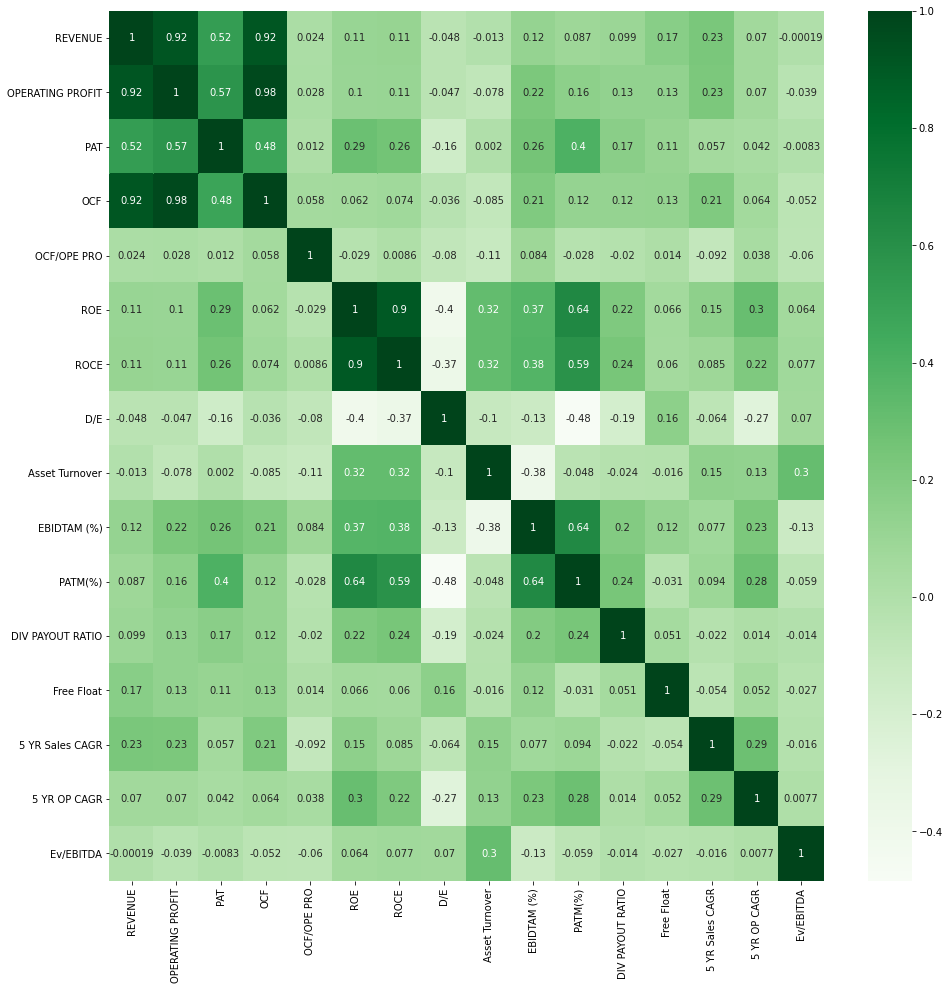

In [ ]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [ ]:
cor_target = abs(cor["Ev/EBITDA"])
feat = list(cor_target.sort_values(ascending=False).index[1:7])
cor_target.sort_values(ascending=False)[1:7]
#print(list(cor_target.index))

Asset Turnover    0.304903
EBIDTAM (%)       0.133842
ROCE              0.076608
D/E               0.069725
ROE               0.064497
OCF/OPE PRO       0.060054
Name: Ev/EBITDA, dtype: float64

In [ ]:
X,y = data1[feat], data1['Ev/EBITDA']

In [ ]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')[feat]
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [ ]:
print("Predictions by different models: ")
print(*pred_list,sep = '\n')

Predictions by different models: 
[51.43349374]
[24.798882]
[53.69100227]
[47.59391207]
[54.75789452]
[46.14057631]
[51.60883248]
[23.58891373]


## Prediction List

### Mean Squared Error
> Lower the value of error, better the performance

In [ ]:
if PROVIDE_OWN_INPUT==False:
    from sklearn.metrics import mean_squared_error
    for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
        #print(r,'\t',mean_squared_error(y_test.values, p))
        
        print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [ ]:
if PROVIDE_OWN_INPUT==False:
    from sklearn.metrics import r2_score
    for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
        #print(r,'\t',mean_squared_error(y_test.values, p))
        
        print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

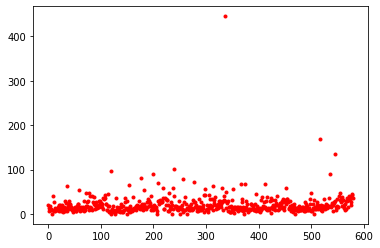

In [ ]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])

In [ ]:
if PROVIDE_OWN_INPUT==False:
    plt.subplots(figsize=(12,5))
    sns.kdeplot(y_train, shade=True, label='Train')
    sns.kdeplot(y_test, shade = True, label= 'Test')
    plt.legend( prop={'size': 30})

In [ ]:

if PROVIDE_OWN_INPUT==False:
    plt.subplots(figsize=(12,5))
    sns.kdeplot(pred_list[3], shade=True, label='Pred')
    sns.kdeplot(y_test, shade = True, label= 'Test')
    plt.legend( prop={'size': 30})

# **M/Sales Prediction**

In [ ]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [ ]:
data2.head()

,Company Name,REVENUE,OPERATING PROFIT,PAT,OCF,OCF/OPE PRO,ROE,ROCE,D/E,Asset Turnover,EBIDTAM (%),PATM(%),DIV PAYOUT RATIO,Free Float,5 YR Sales CAGR,5 YR OP CAGR,M/Sales
0,Multibase India Ltd.,109.94,19.62,15.36,5.17,0.263507,16.77,23.84,0.00,0.97,19.85,13.97,0.00,23.93,0.121380,0.220486,5.80
1,Voith Paper Fabrics India Ltd.,112.03,29.27,23.09,16.74,0.571917,11.36,15.98,0.00,0.44,28.99,20.61,9.51,24.11,0.018936,0.166579,3.60
2,Morganite Crucible (India) Ltd.,120.14,20.20,15.37,20.52,1.015842,16.17,23.00,0.00,1.00,18.20,12.79,29.15,25.00,0.017792,0.022986,3.85
3,Saint-Gobain Sekurit India Ltd.,159.76,25.77,16.08,23.59,0.915406,14.83,20.41,0.03,1.24,14.36,10.06,0.00,25.00,0.037345,0.228726,3.56
4,Xchanging Solutions Ltd.,184.10,42.73,46.71,48.14,1.126609,11.44,13.91,0.00,0.36,30.86,25.37,0.00,6.50,-0.084972,0.199473,2.91


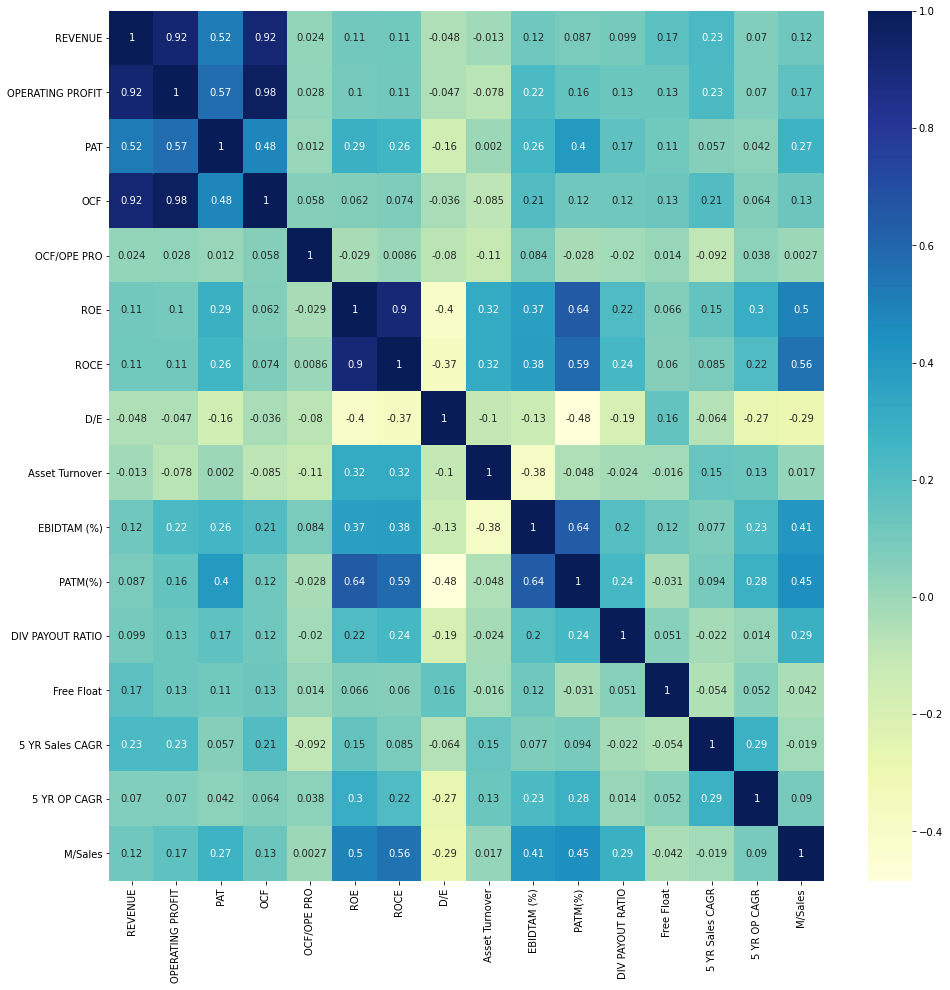

In [ ]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
cor_target = abs(cor["M/Sales"])
feat = list(cor_target.sort_values(ascending=False).index[1:7])
cor_target.sort_values(ascending=False)[1:7]

ROCE                0.557312
ROE                 0.497977
PATM(%)             0.446614
EBIDTAM (%)         0.411841
D/E                 0.290073
DIV PAYOUT RATIO    0.289317
Name: M/Sales, dtype: float64

In [ ]:
X,y = data2[feat], data2['M/Sales']

In [ ]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')[feat]
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [ ]:
print("Predictions by different models: ")
print(*pred_list,sep = '\n')

Predictions by different models: 
[2.98181988]
[3.2163336]
[2.96957705]
[2.99250242]
[3.24980371]
[2.9765045]
[3.07530157]
[3.20980949]


### Mean Squared Error
> Lower the value of error, better the performance

In [ ]:
if PROVIDE_OWN_INPUT==False:
    from sklearn.metrics import mean_squared_error
    for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
        #print(r,'\t',mean_squared_error(y_test.values, p))
        
        print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [ ]:
if PROVIDE_OWN_INPUT==False:

    from sklearn.metrics import r2_score
    for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
        #print(r,'\t',mean_squared_error(y_test.values, p))
        
        print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

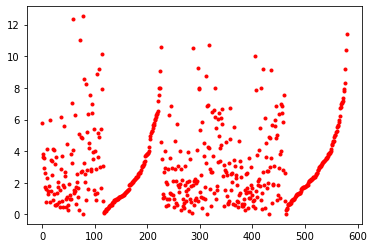

In [ ]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])

In [ ]:
if PROVIDE_OWN_INPUT==False:
        
    plt.subplots(figsize=(12,5))
    sns.kdeplot(y_train, shade=True, label='Train')
    sns.kdeplot(y_test, shade = True, label= 'Test')
    plt.legend( prop={'size': 30})

In [ ]:
if PROVIDE_OWN_INPUT==False:
        
    plt.subplots(figsize=(12,5))
    sns.kdeplot(pred_list[3], shade=True, label='Pred')
    sns.kdeplot(y_test, shade = True, label= 'Test')
    plt.legend( prop={'size': 30})